In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

#### LOAD DATASET

In [4]:
df=pd.read_csv('./Downloads/City_of_Chicago_Crime_Data.csv')

##### DATA EXPLORATION

In [6]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1511,29.0,NaN,NaN,2012,NaN,NaN,NaN
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,NaN,NaN,2012,NaN,NaN,NaN
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,NaN,NaN,2012,NaN,NaN,NaN
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,NaN,NaN,2012,NaN,NaN,NaN
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,NaN,NaN,2012,NaN,NaN,NaN


In [7]:
df.describe()

,Beat,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,336335.000000,336328.000000,3.354730e+05,3.354730e+05,336335.0,335473.000000,335473.000000
mean,1164.114445,22.831528,1.164532e+06,1.885423e+06,2012.0,41.841195,-87.671753
std,694.483182,13.783402,1.771722e+04,3.348015e+04,0.0,0.092153,0.063962
min,111.000000,1.000000,0.000000e+00,0.000000e+00,2012.0,36.619446,-91.686566
25%,614.000000,10.000000,1.152706e+06,1.858757e+06,2012.0,41.767848,-87.714655
50%,1024.000000,23.000000,1.166048e+06,1.890677e+06,2012.0,41.855810,-87.666054
75%,1722.000000,34.000000,1.176356e+06,1.909211e+06,2012.0,41.906640,-87.628203
max,2535.000000,50.000000,1.205119e+06,1.951527e+06,2012.0,42.022586,-87.524529


In [8]:
df.shape

(336335, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336335 entries, 0 to 336334
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  336335 non-null  object 
 1   Block                 336335 non-null  object 
 2   Primary Type          336335 non-null  object 
 3   Description           336335 non-null  object 
 4   Location Description  335863 non-null  object 
 5   Arrest                336335 non-null  bool   
 6   Domestic              336335 non-null  bool   
 7   Beat                  336335 non-null  int64  
 8   Ward                  336328 non-null  float64
 9   X Coordinate          335473 non-null  float64
 10  Y Coordinate          335473 non-null  float64
 11  Year                  336335 non-null  int64  
 12  Latitude              335473 non-null  float64
 13  Longitude             335473 non-null  float64
 14  Location              335473 non-null  object 
dtype

##### HANDLING MISSING VALUES

In [11]:
df.isnull()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,False,False,False,False,True,False,False,False,False,True,True,False,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
4,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336330,False,False,False,False,True,False,False,False,False,True,True,False,True,True,True
336331,False,False,False,False,True,False,False,False,False,True,True,False,True,True,True
336332,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
336333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Date                      0
Block                     0
Primary Type              0
Description               0
Location Description    472
Arrest                    0
Domestic                  0
Beat                      0
Ward                      7
X Coordinate            862
Y Coordinate            862
Year                      0
Latitude                862
Longitude               862
Location                862
dtype: int64

## Handle Missing Values

#### Longitude and Latitude Values

Find the minimum and the maximum values
fill the missing values with values within the range of the minimum and maximum values.

In [14]:
df.columns

Index(['Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'Ward', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [15]:
data_loct=df[['Latitude', 'Longitude']]
data_loct.shape

(336335, 2)

In [16]:
data_loct.isnull().sum()

Latitude     862
Longitude    862
dtype: int64

In [17]:
max_lat = df['Latitude'].max()
min_lat=df['Latitude'].min()
max_lat

42.022585817

In [18]:
min_lat

36.619446395

In [19]:
max_long = df['Longitude'].max()
min_long=df['Longitude'].min()
max_long

-87.524529378

In [20]:
min_long

-91.686565684

In [21]:
latitude_range = (36.619446395, 42.022585817)  # Example range for latitude
longitude_range = (-91.686565684, -87.524529378)  # Example range for longitude

# Function to fill NaNs with random values
def fill_na_with_random(df, lat_range, lon_range):
    df_filled = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    # Generate random values for latitude and longitude
    lat_random = np.random.uniform(lat_range[0], lat_range[1], size=df.shape[0])
    lon_random = np.random.uniform(lon_range[0], lon_range[1], size=df.shape[0])
    
    # Fill NaN values with the random values without using inplace=True
    df_filled['Latitude'] = df_filled['Latitude'].fillna(pd.Series(lat_random, index=df_filled.index))
    df_filled['Longitude'] = df_filled['Longitude'].fillna(pd.Series(lon_random, index=df_filled.index))
    
    return df_filled

# Fill missing values
data_filled = fill_na_with_random(data_loct, latitude_range, longitude_range)

# Print the resulting DataFrame
data_filled.shape

(336335, 2)

In [22]:
data_filled.head()

,Latitude,Longitude
0,37.709207,-90.012964
1,37.346571,-91.379965
2,39.041594,-87.964057
3,37.521731,-89.440393
4,36.967571,-91.133365


#### Update the original datase with the data filled 

In [24]:
df.update(data_filled)
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1511,29.0,NaN,NaN,2012,37.709207,-90.012964,NaN
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,NaN,NaN,2012,37.346571,-91.379965,NaN
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,NaN,NaN,2012,39.041594,-87.964057,NaN
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,NaN,NaN,2012,37.521731,-89.440393,NaN
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,NaN,NaN,2012,36.967571,-91.133365,NaN


#### Fill in the Location missing values.
The Location missing values is a combination of the longitude and latitude values.

Create a location tuple from the longitude and latitude columns then fill the location column with the combined long and lat values

In [26]:
# Function to create a location tuple from latitude and longitude
def create_location(lat, lon):
    return f"({lat}, {lon})" if pd.notnull(lat) and pd.notnull(lon) else None

# Fill the Location column with the combined Latitude and Longitude
df['Location'] = df.apply(lambda row: create_location(row['Latitude'], row['Longitude']), axis=1)

# Verify that the Location column is now filled
missing_location_final = df['Location'].isnull().sum()
print("Final check for missing values in Location:\n", missing_location_final)

Final check for missing values in Location:
 0


In [27]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1511,29.0,NaN,NaN,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)"
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,NaN,NaN,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)"
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,NaN,NaN,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)"
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,NaN,NaN,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)"
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,NaN,NaN,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)"


In [28]:
df.head(30)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1511,29.0,NaN,NaN,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)"
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,NaN,NaN,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)"
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,NaN,NaN,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)"
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,NaN,NaN,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)"
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,NaN,NaN,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)"
5,02/16/2012 12:01:00 AM,002XX W 117TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,522,34.0,NaN,NaN,2012,40.616927,-90.444745,"(40.616927116771315, -90.44474451604412)"
6,06/10/2012 04:00:00 PM,001XX W 47TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,215,3.0,NaN,NaN,2012,37.399698,-91.669792,"(37.3996978045939, -91.6697921787902)"
7,02/21/2012 09:50:00 AM,023XX W FULLERTON AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1432,1.0,NaN,NaN,2012,40.489628,-88.821354,"(40.489628012468096, -88.82135350061273)"
8,01/02/2012 09:00:00 AM,049XX S DREXEL BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,223,4.0,NaN,NaN,2012,40.320351,-91.260524,"(40.3203507917282, -91.26052409178102)"
9,08/01/2012 09:55:00 AM,098XX S DAMEN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,2213,19.0,NaN,NaN,2012,41.424752,-89.937114,"(41.42475208343238, -89.93711378970379)"


### X and Y coordinates missing values

SInce there's no correlation between the the X and Y coordinates columns and the rest of the columns, I drop the columns

In [30]:
df = df.drop(['X Coordinate', 'Y Coordinate'], axis=1)

In [31]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1511,29.0,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)"
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)"
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)"
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)"
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)"


### Handling Missing values in the categorical Columns

In [33]:
print("\nMissing values in categorical columns:")
categorical_columns=df.select_dtypes(include=['object']).columns
missing_values=df[categorical_columns].isnull().sum()
print(missing_values)


Missing values in categorical columns:
Date                      0
Block                     0
Primary Type              0
Description               0
Location Description    472
Location                  0
dtype: int64


## Group-based Imputation
Impute missing values based on 'Primary Type' and 'Description'

In [35]:
# Step 1: Inspect the Location Description column
print("Missing values in Location Description before imputation:")
print(df['Location Description'].isnull().sum())

# Step 2: Mode Imputation
# Fill missing Location Description with the most frequent value (mode)
# mode_location_description = df['Location Description'].mode()[0]
# df['Location Description'] = df['Location Description'].fillna(mode_location_description)

# Alternatively, Step 3: Group-based Imputation
# Impute missing values based on 'Primary Type' and 'Description'
df['Location Description'] = df.groupby(['Primary Type', 'Description'])['Location Description'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else mode_location_description))

# Step 4: Verify that there are no missing values in the Location Description column
print("Missing values in Location Description after imputation:")
print(df['Location Description'].isnull().sum())

# Display a few rows to check the result
df[['Primary Type', 'Description', 'Location Description']].head(10)


Missing values in Location Description before imputation:
472
Missing values in Location Description after imputation:
0


,Primary Type,Description,Location Description
0,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE
1,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE
2,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE
3,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL
4,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE
5,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE
6,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET
7,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE
8,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT
9,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE


In [36]:
df.head(30)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)"
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)"
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)"
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)"
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)"
5,02/16/2012 12:01:00 AM,002XX W 117TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,522,34.0,2012,40.616927,-90.444745,"(40.616927116771315, -90.44474451604412)"
6,06/10/2012 04:00:00 PM,001XX W 47TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,215,3.0,2012,37.399698,-91.669792,"(37.3996978045939, -91.6697921787902)"
7,02/21/2012 09:50:00 AM,023XX W FULLERTON AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1432,1.0,2012,40.489628,-88.821354,"(40.489628012468096, -88.82135350061273)"
8,01/02/2012 09:00:00 AM,049XX S DREXEL BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,223,4.0,2012,40.320351,-91.260524,"(40.3203507917282, -91.26052409178102)"
9,08/01/2012 09:55:00 AM,098XX S DAMEN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2213,19.0,2012,41.424752,-89.937114,"(41.42475208343238, -89.93711378970379)"


# VISUALIZATION

1. HISTOGRAM
   
   Visualize the Distribution of wards

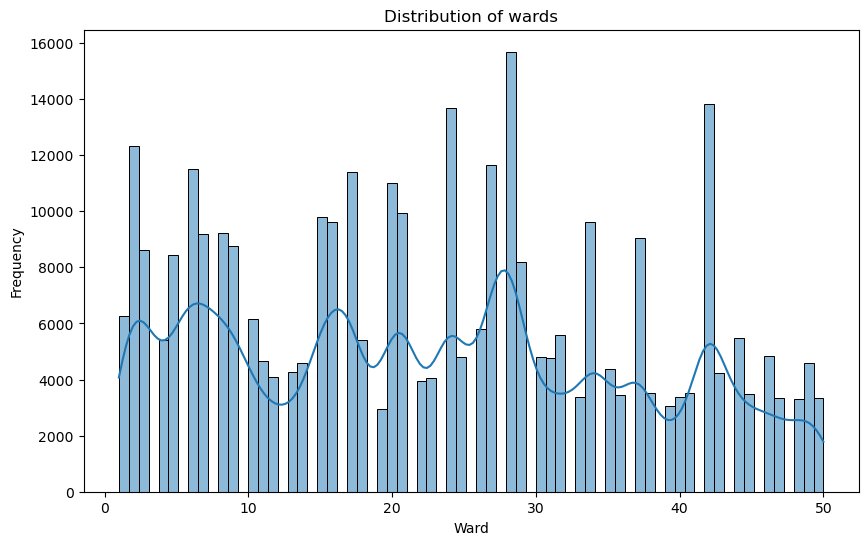

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['Ward'], kde=True)
plt.title('Distribution of wards')
plt.xlabel('Ward')
plt.ylabel('Frequency')
plt.show()

##### 2. BAR PLOT

FREQUENCY OF THE ARREST

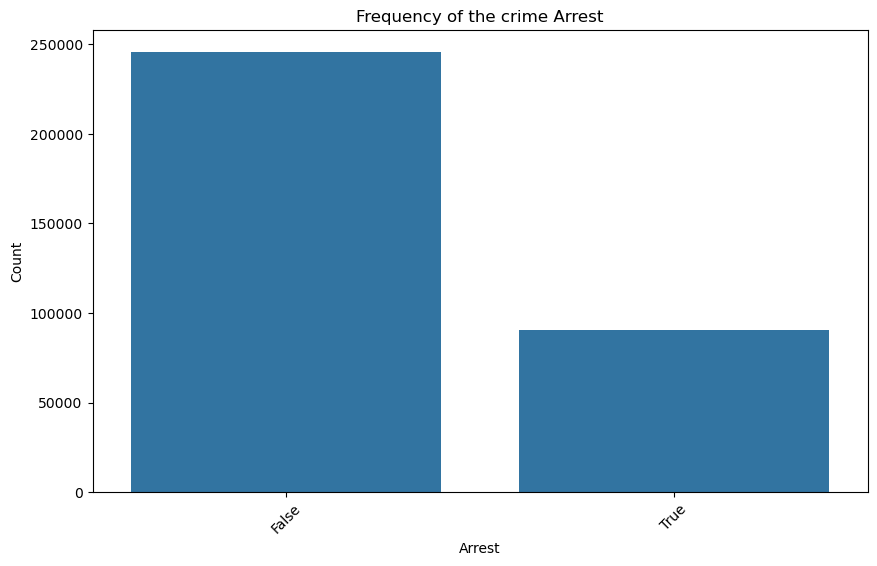

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='Arrest', data=df)
plt.title('Frequency of the crime Arrest')
plt.xlabel('Arrest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 3. BOX PLOT
The Arrests made in wards

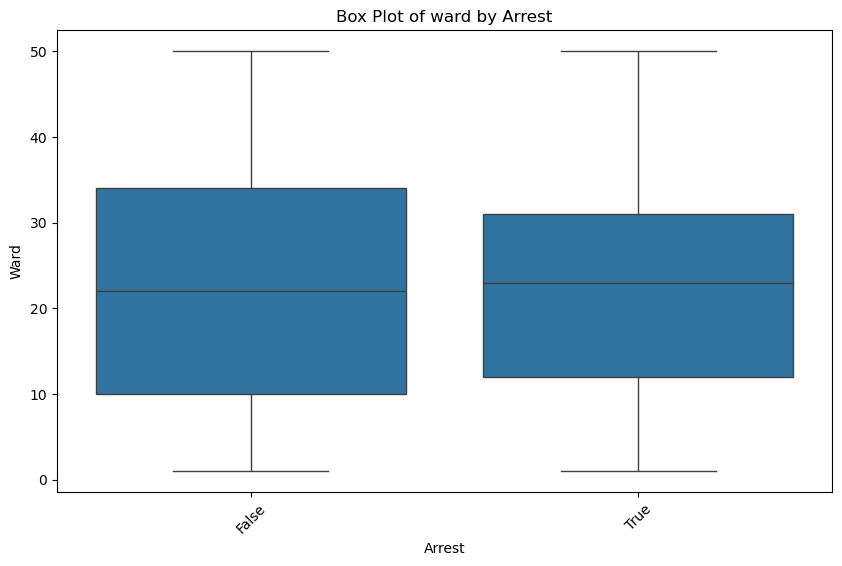

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Arrest', y='Ward', data=df)
plt.title('Box Plot of ward by Arrest')
plt.xlabel('Arrest')
plt.ylabel('Ward')
plt.xticks(rotation=45)
plt.show()

##### 4. SCATTER PLOT

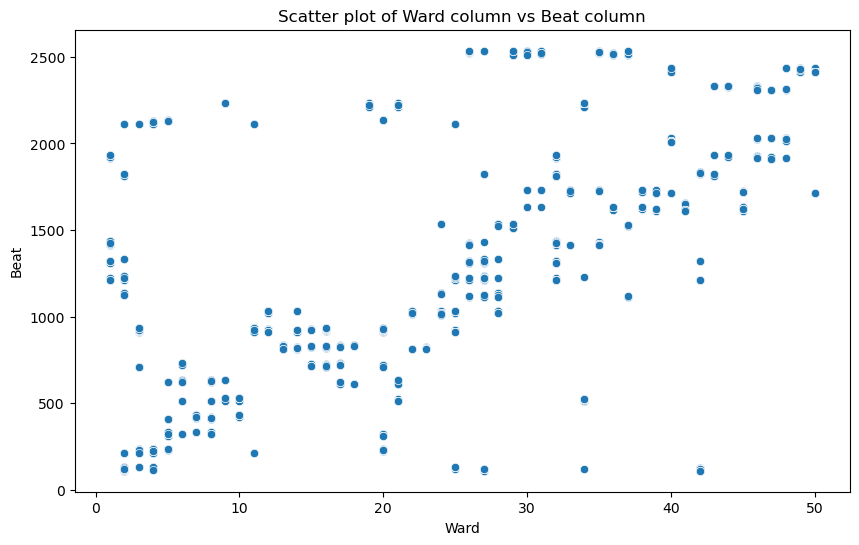

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ward', y='Beat', data=df)
plt.title('Scatter plot of Ward column vs Beat column')
plt.xlabel('Ward')
plt.ylabel('Beat')
plt.show()

##### 5. HEATMAP PLOT TO SHOW THE CORRELATION OF NUMERICAL DATA IN THE DATASET

##### IDENTIFY CATEGORICAL COLUMNS AND THE MISSING DATA IN CATEGORICAL COLUMNS

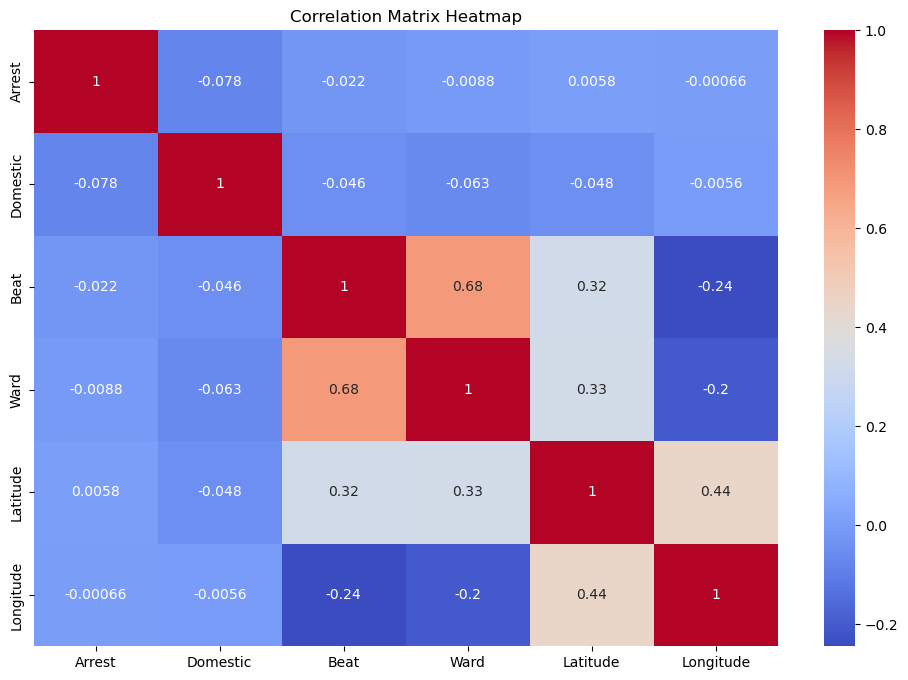

In [47]:
dataset=df.loc[:, ['Arrest', 'Domestic', 'Beat', 'Ward', 'Latitude', 'Longitude',]]
plt.figure(figsize=(12, 8))
correlation_matrix=dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
#Date	Block	Primary Type	Description	Location Description	Arrest	Domestic	Beat	Ward	X Coordinate	Y Coordinate	Year	Latitude	Longitude	Location
#sns.heatmap(glue, cmap="crest")
#correlation_matrix = df.corr(numeric_only=True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
#plt.show()


# ENCODING CATEGORICAL VARIABLES
1. APPLY LABEL ENCODING TO ORDINAL COLUMNS

   Label Encoding: Maintains the intrinsic order in ordinal data, making it suitable for such features.

In [49]:
# from sklearn.preprocessing import LabelEncoder
# ordinal_columns=['Description']
# label_encoder=LabelEncoder()
# for column in ordinal_columns:
#     df[column]=label_encoder.fit_transform(df[column])

2. Apply One-Hot Encoding to nominal columns

   One-Hot Encoding: This method avoids the introduction of ordinal relationships that don't exist in nominal data.

In [51]:
# #from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# nominal_columns=list(set(categorical_columns) - set(ordinal_columns))
# transformed_data = onehotencoder.fit_transform(df[nominal_columns])

# # the above transformed_data is an array so convert it to dataframe
# encoded_data = pd.DataFrame(transformed_data, index=df.index)

# # now concatenate the original data and the encoded data using pandas
# concatenated_data = pd.concat([df, encoded_data], axis=1)

#one_hot_encoded_data = pd.get_dummies(df, columns = nominal_columns, drop_first=True)
#df=pd.get_dummies(df, columns=nominal_columns, drop_first=True)
#pd.get_dummies(data, columns=categorical_cols)
#pandas.get_dummies.
#one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender'])
#print(one_hot_encoded_data)
#scikit-learn as sklearn.preprocessing.OneHotEncoder.one_hot_encoder=OneHotEncoder() for column in nominal_columns: df[column]=one_hot_encoder.fit_transform(df[column]) 
# col is (column_name, column), use just column data here

In [52]:
# concatenated_data.head()

#### VERIFY ENCODING

In [54]:
# print("First few rows of the dataset after encoding:\n", df.head())

##### 1. Encoding Categorical Variables

##### Explanation of Encoding Techniques:

#### One-Hot Encoding: 
Converts categorical variables into a series of binary columns. It is best suited for nominal (unordered) categorical data with low cardinality.

#### Label Encoding: 
Assigns a unique integer to each category. This is more suitable for ordinal categorical variables where the categories have a meaningful order.

#### Feature Hashing: 
Reduces the dimensionality of categorical features by hashing categories into a fixed number of bins. This is useful for high cardinality features but may cause collisions (different categories hashed to the same value).

#### Target Encoding (Encode categories with dataset statistics): 
Replaces categories with the mean of the target variable. Useful for high cardinality features, but it may introduce data leakage if not done carefully.

We'll apply these methods to appropriate categorical columns in the dataset.

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

In [57]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Year,Latitude,Longitude,Location
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)"
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)"
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)"
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)"
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)"


In [58]:
categorical_columns=['Block', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']

#One-Hot Encoding for Low cardinality columns
one_hot_columns = ['Primary Type', 'Location Description']
one_hot_encoder=OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded=pd.DataFrame(one_hot_encoder.fit_transform(df[one_hot_columns]), columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

#Label Encoding for ordinal columns
label_encoder=LabelEncoder()
df['Description_label']=label_encoder.fit_transform(df['Description'])
#(df['Block'], df['Arrest'])

#Target Encoding for high cardinally columns
target_encoder=TargetEncoder()
df['Block_Encoded']=target_encoder.fit_transform(df['Block'], df['Arrest'])

#Combine the encoded columns with the original dataset
data_encoded=pd.concat([df,one_hot_encoded], axis=1)

#Drop the original columns that have been encoded
data_encoded.drop(columns=one_hot_columns + ['Description'], inplace=True)

#Display the forst few rows of the encoded dataset
data_encoded.head()

,Date,Block,Arrest,Domestic,Beat,Ward,Year,Latitude,Longitude,Location,...,Location Description_TAXI CAB,Location Description_TAXICAB,Location Description_VACANT LOT,Location Description_VACANT LOT/LAND,Location Description_VEHICLE - OTHER RIDE SERVICE,Location Description_VEHICLE NON-COMMERCIAL,Location Description_VEHICLE-COMMERCIAL,Location Description_VESTIBULE,Location Description_WAREHOUSE,Location Description_YARD
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,False,False,1511,29.0,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,False,False,2212,19.0,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,False,False,1511,29.0,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,False,False,2532,37.0,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,False,True,1034,25.0,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Reducing Cardinality
#### Explanation:
High cardinality in categorical features can lead to overfitting and increased computational complexity. We can reduce cardinality by:

#### Grouping Rare Categories: 
Combine infrequent categories into an "Other" category.

#### Feature Binning: 
Group categories based on domain knowledge or statistical measures.

In [60]:
#Analyzing the cardinality of categorical features
for col in categorical_columns:
    print(f"{col} has {df[col].nunique()} unique categories.")

#Grouping rare categories in 'Location Description'
threshold=0.01  #The minimum percentage to keep a category
location_desc_counts=df['Location Description'].value_counts(normalize=True)
rare_locations=location_desc_counts[location_desc_counts < threshold].index

#Replace rare categories with 'Other'
df['Location Description']=df['Location Description'].replace(rare_locations, 'other')

#Verify the changes
df['Location Description'].value_counts()

Block has 28373 unique categories.
Primary Type has 31 unique categories.
Description has 331 unique categories.
Location Description has 135 unique categories.
Arrest has 2 unique categories.
Domestic has 2 unique categories.


Location Description
STREET                            76513
RESIDENCE                         53975
other                             43933
APARTMENT                         41424
SIDEWALK                          40890
OTHER                             11674
PARKING LOT/GARAGE(NON.RESID.)     9838
ALLEY                              7767
RESIDENTIAL YARD (FRONT/BACK)      7533
RESIDENCE-GARAGE                   6237
SCHOOL, PUBLIC, BUILDING           6200
SMALL RETAIL STORE                 6080
RESIDENCE PORCH/HALLWAY            5877
VEHICLE NON-COMMERCIAL             5492
RESTAURANT                         5191
DEPARTMENT STORE                   4154
GROCERY FOOD STORE                 3557
Name: count, dtype: int64

#### Creating New Features
#### Explanation:
Creating new features from existing categorical data can help uncover hidden patterns and relationships. For example:

#### Combining Categories: 
Create a new feature that combines related categorical features.

#### Interaction Terms: 
Multiply or concatenate categorical variables to capture interactions

In [62]:
# Creating a new feature by combining 'Primary Type' and 'Location Description'
df['Type_Location'] = df['Primary Type'] + "_" + df['Location Description']

# Creating an interaction term between 'Location description' and 'Beat')
df['Block_Beat_Interaction'] = df['Block'].astype(str) + "_" + df['Beat'].astype(str)

# Display the first few rows of the dataset with the new features
df[['Type_Location', 'Block_Beat_Interaction']].head()


,Type_Location,Block_Beat_Interaction
0,DECEPTIVE PRACTICE_RESIDENCE,057XX W OHIO ST_1511
1,DECEPTIVE PRACTICE_RESIDENCE,115XX S CAMPBELL AVE_2212
2,DECEPTIVE PRACTICE_RESIDENCE,010XX N MAYFIELD AVE_1511
3,DECEPTIVE PRACTICE_VEHICLE NON-COMMERCIAL,017XX N LOTUS AVE_2532
4,OFFENSE INVOLVING CHILDREN_RESIDENCE,023XX S HOYNE AVE_1034


In [63]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Year,Latitude,Longitude,Location,Description_label,Block_Encoded,Type_Location,Block_Beat_Interaction
0,05/05/2012 12:25:00 PM,057XX W OHIO ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,37.709207,-90.012964,"(37.7092071584712, -90.01296370551323)",141,0.341546,DECEPTIVE PRACTICE_RESIDENCE,057XX W OHIO ST_1511
1,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2212,19.0,2012,37.346571,-91.379965,"(37.346571264651885, -91.37996474916046)",141,0.231362,DECEPTIVE PRACTICE_RESIDENCE,115XX S CAMPBELL AVE_2212
2,11/13/2012 12:00:00 AM,010XX N MAYFIELD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1511,29.0,2012,39.041594,-87.964057,"(39.04159423595616, -87.96405673053454)",141,0.303062,DECEPTIVE PRACTICE_RESIDENCE,010XX N MAYFIELD AVE_1511
3,09/01/2012 10:20:00 AM,017XX N LOTUS AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,VEHICLE NON-COMMERCIAL,False,False,2532,37.0,2012,37.521731,-89.440393,"(37.52173121261585, -89.44039326201931)",141,0.248276,DECEPTIVE PRACTICE_VEHICLE NON-COMMERCIAL,017XX N LOTUS AVE_2532
4,09/01/2012 12:00:00 PM,023XX S HOYNE AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1034,25.0,2012,36.967571,-91.133365,"(36.96757137134879, -91.13336462457374)",2,0.236133,OFFENSE INVOLVING CHILDREN_RESIDENCE,023XX S HOYNE AVE_1034


### Summary
#### Encoding Categorical Variables: 
I used One-Hot Encoding for low cardinality features, Label Encoding for ordinal features, and Target Encoding for high cardinality features.

#### Reducing Cardinality: 
I grouped rare categories in the Location Description feature to reduce its cardinality.

#### Creating New Features: 
I created new features by combining related categories and generating interaction terms.

These steps help in preparing the dataset for modeling by improving its interpretability and reducing the risk of overfitting. 

The newly created features may also enhance predictive performance by capturing more complex relationships within the data.

In [65]:
# crime_count = df.groupby('Primary Type')['crime_count'].sum().sort_values(ascending = False)[:15]
# crime_count